In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#

In [ ]:
df =  pd.read_csv('/content/Training set values.csv')

In [ ]:
df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [ ]:
labels = pd.read_csv('/content/Training set labels.csv')

In [ ]:
labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [ ]:
train = df.copy()

In [ ]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [ ]:
train.shape

(59400, 40)

In [ ]:
train = pd.merge(train,labels,on='id',how='left')

In [ ]:
train.shape

(59400, 41)

In [ ]:
train.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity  quantity_group  \
0  ...    never pay          soft          good      seasonal        seasonal   
1  ...    never pay          soft          good  insufficient    insufficient   
2  ...    never pay          soft          good  insufficient    insufficient   
3  ...      unknown          soft          good           dry             dry   
4  ...      monthly          soft          good        enough          enough   

                 source           source_type  source_class  \
0  rainwater harvesting  rainwater harvesting       surface   
1                spring                spring   groundwater   
2  rainwater harvesting  rainwater harvesting       surface   
3          shallow well          shallow well   groundwater   
4                spring                spring   groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other                 other  
4  communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [ ]:
test.shape

(14850, 40)

#EDA on Train and Test Data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
category_train_col = train.select_dtypes(include='object').columns
category_train_col

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [ ]:
num_train_col = train.select_dtypes(exclude='object').columns
num_train_col

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [ ]:
train.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [ ]:
train.isnull().sum().sort_values(ascending=False)

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
water_quality                0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity                     0
quality_group                0
extraction_type              0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_group        0
id                           0
construction_year            0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
num_private                  0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
status_group                 0
dtype: int64

In [ ]:
train[category_train_col].isnull().sum().sort_values(ascending=False)

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
quality_group                0
quantity                     0
quantity_group               0
date_recorded                0
source                       0
payment_type                 0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
water_quality                0
extraction_type_group        0
payment                      0
management_group             0
management                   0
extraction_type_class        0
extraction_type              0
recorded_by                  0
ward                         0
lga                          0
region                       0
basin                        0
status_group                 0
dtype: int64

In [ ]:
train[num_train_col].isnull().sum().sort_values(ascending=False)

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [ ]:
train['wpt_name'].isnull().sum()

2

In [ ]:
train_cols = train[category_train_col].isnull().sum().sort_values(ascending=False)
train_cols
train_emp_cols = train_cols[train_cols>0]
train_emp_cols

scheme_name          28810
scheme_management     3878
installer             3655
funder                3637
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
dtype: int64

In [ ]:
for col in train_emp_cols.index:
  train[col].fillna(train[col].mode()[0],inplace=True)

In [ ]:
train.isnull().sum().sort_values(ascending=False)

id                       0
scheme_name              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
permit                   0
scheme_management        0
amount_tsh               0
recorded_by              0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
status_group             0
dtype: int64

In [ ]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [ ]:
num_train_col

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [ ]:
train['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [ ]:
# proportions of each function of pumps
train.status_group.value_counts()/len(train)

status_group
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: count, dtype: float64

In [ ]:
train.groupby('payment')['id'].count()

payment
never pay                25348
other                     1054
pay annually              3642
pay monthly               8300
pay per bucket            8985
pay when scheme fails     3914
unknown                   8157
Name: id, dtype: int64

In [ ]:
train.status_group.groupby(train.payment).groups
train.payment.value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

In [ ]:
train.shape

(59400, 41)

#Univariate and Bivariate Analysis

<Axes: xlabel='quantity', ylabel='count'>

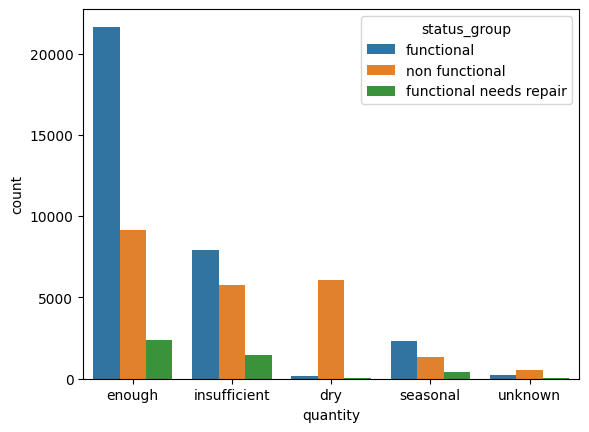

In [ ]:
sns.countplot(train,x='quantity',hue='status_group')

<Axes: xlabel='status_group', ylabel='count'>

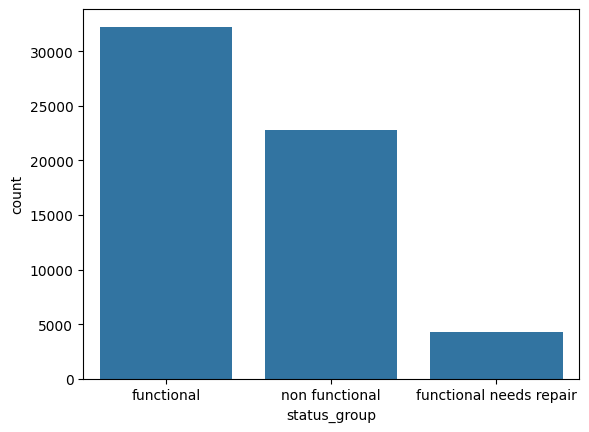

In [ ]:
sns.countplot(train,x=train.status_group)

<ipython-input-74-fb5516194633>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


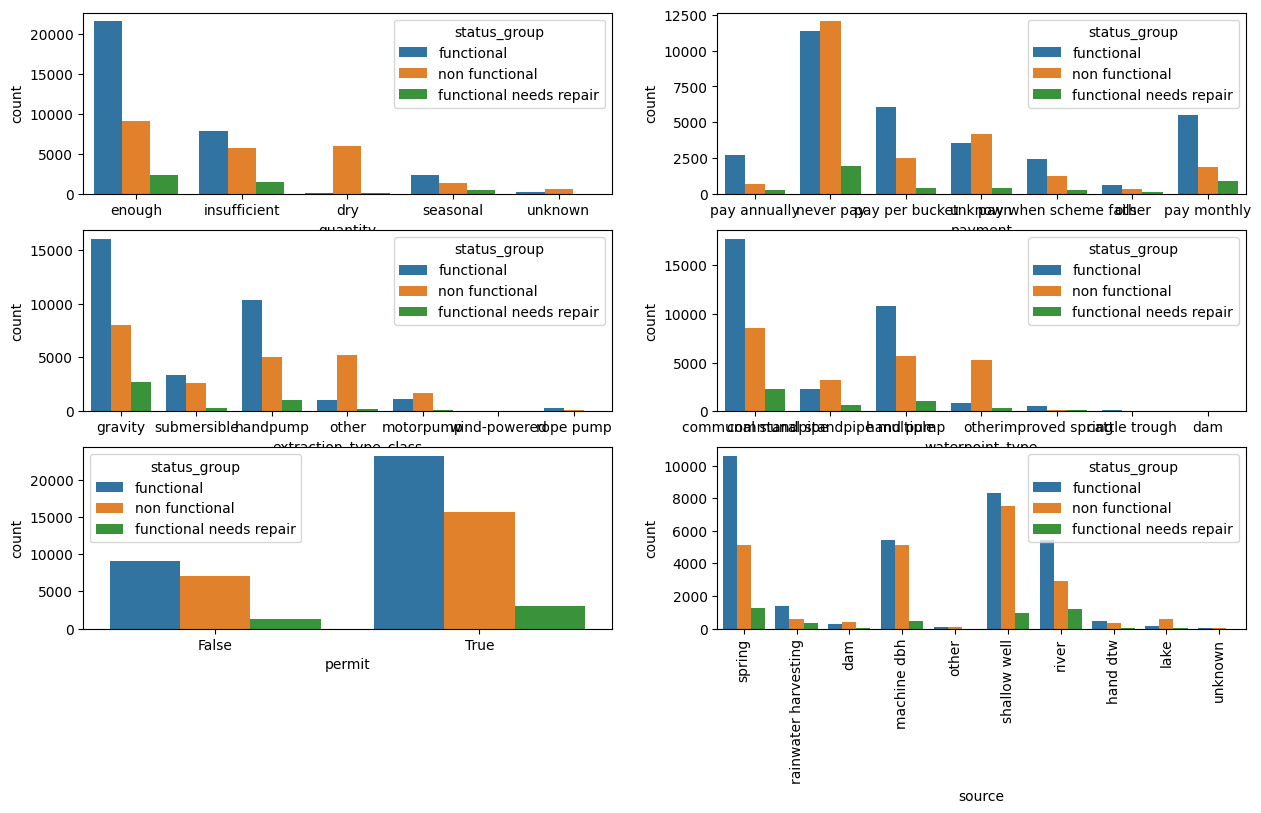

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
plt.subplot(3,2,1)
sns.countplot(train,x='quantity',hue='status_group')
plt.subplot(3,2,2)
sns.countplot(train,x='payment',hue='status_group')
plt.subplot(3,2,3)
plt.xticks(rotation=0)
sns.countplot(train,x='extraction_type_class',hue='status_group')
plt.subplot(3,2,4)
sns.countplot(train,x='waterpoint_type',hue='status_group')
plt.subplot(3,2,5)
sns.countplot(train,x='permit',hue='status_group')
plt.subplot(3,2,6)
sns.countplot(train,x='source',hue='status_group')
plt.xticks(rotation=90)
plt.show()

<ipython-input-77-d7db50b471fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.construction_year,hist=True,kde=False,rug=True,rug_kws={'color':'r'})


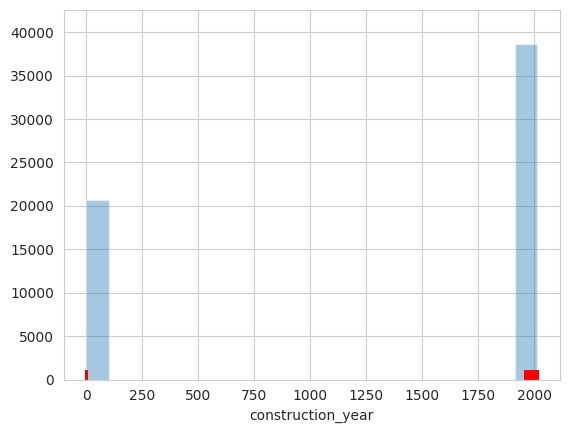

In [ ]:
with sns.axes_style('whitegrid'):
  sns.distplot(train.construction_year,hist=True,kde=False,rug=True,rug_kws={'color':'r'})

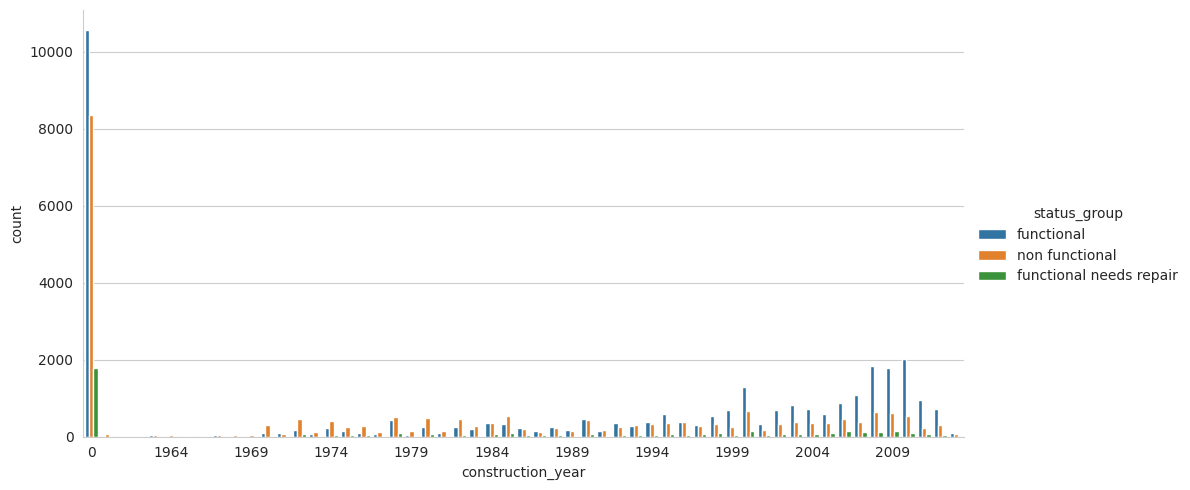

In [ ]:
with sns.axes_style('whitegrid'):
  g = sns.catplot(x="construction_year",data=train,aspect=2,hue='status_group',kind='count')
  g.set_xticklabels(step = 5)
#

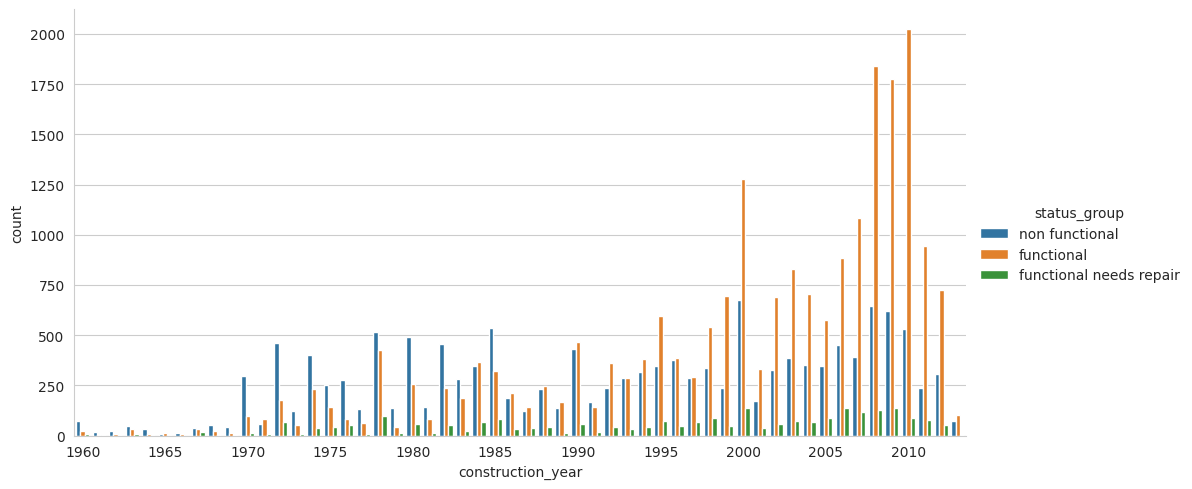

In [ ]:
x= train[train['construction_year']>0]
with sns.axes_style('whitegrid'):
 g = sns.catplot(x="construction_year",data=x,aspect=2,hue='status_group',kind='count')
 g.set_xticklabels(step = 5)
 plt.show()

<Axes: xlabel='construction_year', ylabel='amount_tsh'>

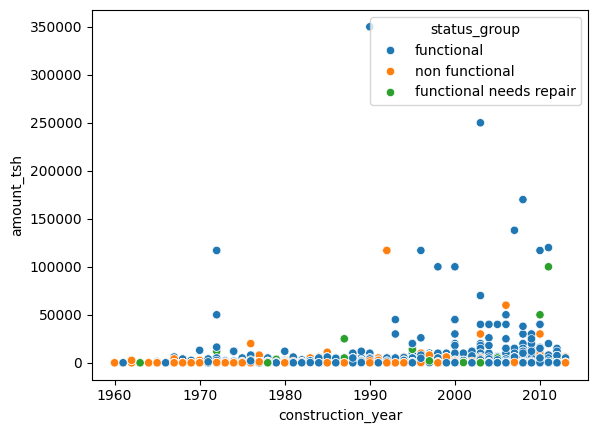

In [ ]:
sns.scatterplot(x,x="construction_year",y="amount_tsh",hue='status_group')

<Axes: xlabel='population', ylabel='amount_tsh'>

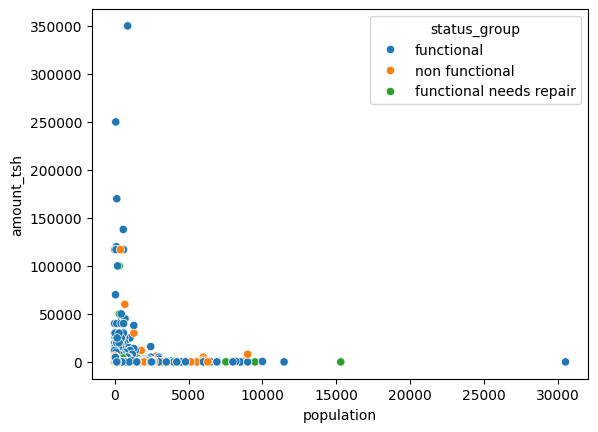

In [ ]:
sns.scatterplot(x,x="population",y="amount_tsh",hue="status_group")

In [ ]:
train.water_quality.value_counts().index

Index(['soft', 'salty', 'unknown', 'milky', 'coloured', 'salty abandoned',
       'fluoride', 'fluoride abandoned'],
      dtype='object', name='water_quality')

In [ ]:
train.status_group.value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7af290470bb0>,
 [Text(-0.9886223965008097, 0.48231292449715246, 'soft'),
  Text(0.875055962561955, -0.6665411183001171, 'salty'),
  Text(1.0525117956869652, -0.3197169372113407, 'unknown'),
  Text(1.0871222956831, -0.16782465322087525, 'milky'),
  Text(1.0960540047922693, -0.09308930432024967, 'coloured'),
  Text(1.099080838534745, -0.04495898537291259, 'salty abandoned'),
  Text(1.099915758094059, -0.013613416043433663, 'fluoride'),
  Text(1.0999995552056978, -0.0009892154806111502, 'fluoride abandoned')])

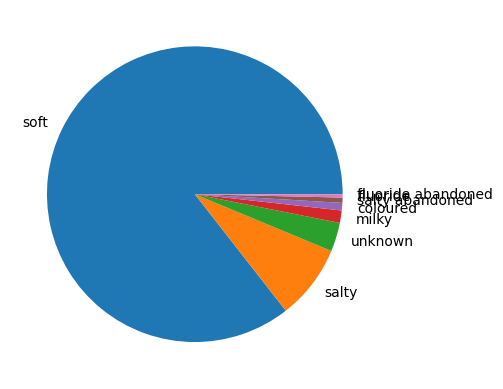

In [ ]:
import matplotlib.pyplot as plt
plt.pie(train.water_quality.value_counts(),labels=train.water_quality.value_counts().index)

In [ ]:
px.pie(df,values='amount_tsh',names='water_quality')

In [ ]:
train[['extraction_type','extraction_type_class']]

extraction_type extraction_type_class
0             gravity               gravity
1             gravity               gravity
2             gravity               gravity
3         submersible           submersible
4             gravity               gravity
...               ...                   ...
59395         gravity               gravity
59396         gravity               gravity
59397          swn 80              handpump
59398     nira/tanira              handpump
59399     nira/tanira              handpump

[59400 rows x 2 columns]

In [ ]:
x.select_dtypes(include='object').columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'recorded_by',
       'scheme_management', 'scheme_name', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [ ]:
x['management_group'].value_counts()

management_group
user-group    33657
commercial     2890
parastatal     1096
other           694
unknown         354
Name: count, dtype: int64

In [ ]:
px.pie(x,values="population",names="management_group")

In [ ]:
dp = pd.pivot_table(x,index='waterpoint_type',values='id',aggfunc='sum')

In [ ]:
dp

id
waterpoint_type                       
cattle trough                  3278562
communal standpipe           791441838
communal standpipe multiple  159261968
dam                             192571
hand pump                    326287929
improved spring               14161052
other                        140154771

In [ ]:
px.pie(df,values="id",names="waterpoint_type")

In [ ]:
df.groupby('waterpoint_type')['id'].sum()

waterpoint_type
cattle trough                     80
communal standpipe             21382
communal standpipe multiple     4261
dam                                5
hand pump                       8759
improved spring                  367
other                           3837
Name: id, dtype: int64

#Finding Outlier in Numerical Data Column

<Axes: >

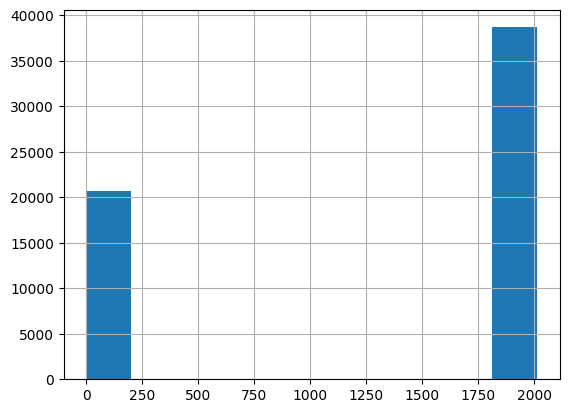

In [ ]:
train['construction_year'].hist(bins=10)

<Axes: >

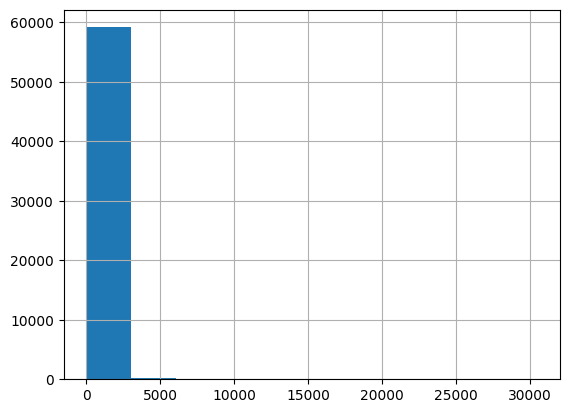

In [ ]:
train['population'].hist(bins=10)

<Axes: >

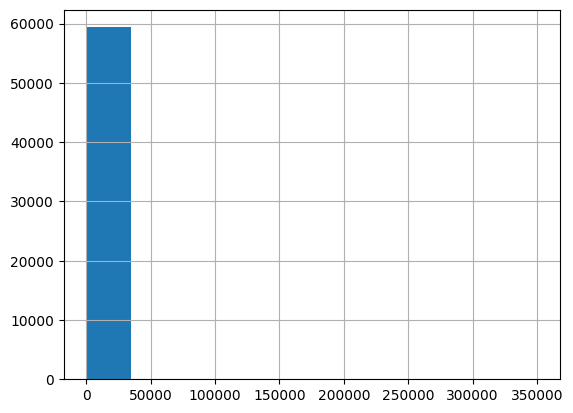

In [ ]:
train['amount_tsh'].hist(bins=10)

<Axes: >

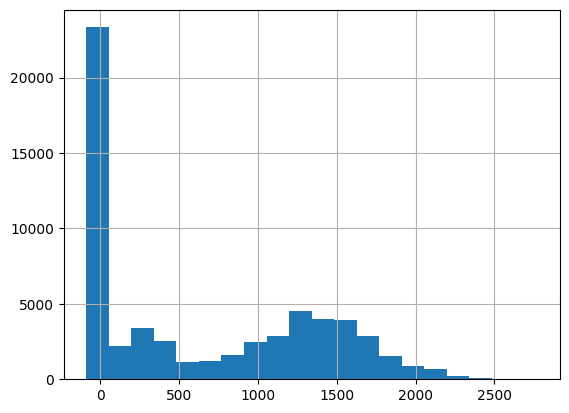

In [ ]:
train['gps_height'].hist(bins=20)

In [ ]:
test[num_train_col].isnull().sum().sort_values(ascending=False)

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [ ]:
test_cols = test[category_train_col[:-1]].isnull().sum().sort_values(ascending=False)
test_emp_cols = test_cols[test_cols>0]
test_emp_cols

scheme_name          7242
scheme_management     969
installer             877
funder                870
public_meeting        821
permit                737
subvillage             99
dtype: int64

In [ ]:
for col in test_emp_cols.index:
  test[col].fillna(test[col].mode()[0],inplace=True)

In [ ]:
test[category_train_col[:-1]].isnull().sum().sort_values(ascending=False)

date_recorded            0
funder                   0
waterpoint_type          0
source_class             0
source_type              0
source                   0
quantity_group           0
quantity                 0
quality_group            0
water_quality            0
payment_type             0
payment                  0
management_group         0
management               0
extraction_type_class    0
extraction_type_group    0
extraction_type          0
permit                   0
scheme_name              0
scheme_management        0
recorded_by              0
public_meeting           0
ward                     0
lga                      0
region                   0
subvillage               0
basin                    0
wpt_name                 0
installer                0
waterpoint_type_group    0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

id                       0
amount_tsh               0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
scheme_name              0
scheme_management        0
recorded_by              0
num_private              0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
public_meeting           0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
waterpoint_type_group    0
dtype: int64

In [ ]:
train_0 = train[(train['construction_year']>0) & (train['population']>0)]
print(f"Before: {train.shape}")
print(f"After: {train_0.shape}")

Before: (59400, 41)
After: (37344, 41)


In [ ]:
test_0=test.drop(['id', 'date_recorded', 'num_private', 'wpt_name', 'scheme_name', 'funder', 'recorded_by', 'installer' ], axis=1)


In [ ]:
test_0.head(10)

amount_tsh  gps_height  longitude   latitude                    basin  \
0         0.0        1996  35.290799  -4.059696                 Internal   
1         0.0        1569  36.656709  -3.309214                  Pangani   
2         0.0        1567  34.767863  -5.004344                 Internal   
3         0.0         267  38.058046  -9.418672  Ruvuma / Southern Coast   
4       500.0        1260  35.006123 -10.950412  Ruvuma / Southern Coast   
5         0.0        1685  36.685279  -3.302420                  Pangani   
6         0.0         550  36.398041  -7.541382                   Rufiji   
7         0.0         234  39.607420 -10.893786  Ruvuma / Southern Coast   
8        30.0         584  39.262951 -10.823588  Ruvuma / Southern Coast   
9         0.0        1083  37.096108  -3.251754                  Pangani   

    subvillage       region  region_code  district_code            lga  ...  \
0       Magoma      Manyara           21              3          Mbulu  ...   
1      Kimnyak       Arusha            2              2   Arusha Rural  ...   
2        Msatu      Singida           13              2  Singida Rural  ...   
3   Kipindimbi        Lindi           80             43         Liwale  ...   
4      Losonga       Ruvuma           10              3         Mbinga  ...   
5       Masaga       Arusha            2              2   Arusha Rural  ...   
6   Kichangani       Iringa           11              7         Kilolo  ...   
7        Ilala       Mtwara            9              4     Tandahimba  ...   
8      Bondeni       Mtwara           90             33         Newala  ...   
9  Donyomuruak  Kilimanjaro            3              7           Siha  ...   

  payment_type  water_quality  quality_group      quantity  quantity_group  \
0    never pay           soft           good      seasonal        seasonal   
1    never pay           soft           good  insufficient    insufficient   
2    never pay           soft           good  insufficient    insufficient   
3      unknown           soft           good           dry             dry   
4      monthly           soft           good        enough          enough   
5    never pay           soft           good        enough          enough   
6    never pay          salty          salty        enough          enough   
7    never pay           soft           good           dry             dry   
8   per bucket           soft           good  insufficient    insufficient   
9      monthly           soft           good        enough          enough   

                 source           source_type source_class  \
0  rainwater harvesting  rainwater harvesting      surface   
1                spring                spring  groundwater   
2  rainwater harvesting  rainwater harvesting      surface   
3          shallow well          shallow well  groundwater   
4                spring                spring  groundwater   
5                spring                spring  groundwater   
6           machine dbh              borehole  groundwater   
7           machine dbh              borehole  groundwater   
8                spring                spring  groundwater   
9                spring                spring  groundwater   

               waterpoint_type waterpoint_type_group  
0                        other                 other  
1           communal standpipe    communal standpipe  
2                        other                 other  
3                        other                 other  
4           communal standpipe    communal standpipe  
5           communal standpipe    communal standpipe  
6                    hand pump             hand pump  
7  communal standpipe multiple    communal standpipe  
8           communal standpipe    communal standpipe  
9           communal standpipe    communal standpipe  

[10 rows x 32 columns]

In [ ]:
train_0.shape

(37344, 41)

In [ ]:
test_0.shape

(14850, 32)

In [ ]:
train_not_missing_dummies = pd.get_dummies(train_0.drop('status_group',axis = 1))
train_not_missing_dummies.shape

(37344, 42983)

In [ ]:
X = train.drop('status_group',axis=1)
y = train['status_group']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)


In [ ]:
categorical_features_indices = np.where(X.dtypes == 'object' )[0]
categorical_features_indices

array([ 2,  3,  5,  8, 10, 11, 12, 15, 16, 19, 20, 21, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(random_seed=42,learning_rate=0.001,iterations=50,loss_function='MultiClass',eval_metric='Accuracy')
clf.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test,y_test),plot=True)
pred = clf.predict_proba(X_test)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7178662	test: 0.7247475	best: 0.7247475 (0)	total: 525ms	remaining: 25.7s
1:	learn: 0.7259259	test: 0.7314815	best: 0.7314815 (1)	total: 925ms	remaining: 22.2s
2:	learn: 0.7266625	test: 0.7361111	best: 0.7361111 (2)	total: 1.28s	remaining: 20s
3:	learn: 0.7269571	test: 0.7336700	best: 0.7361111 (2)	total: 1.62s	remaining: 18.7s
4:	learn: 0.7268729	test: 0.7345960	best: 0.7361111 (2)	total: 1.96s	remaining: 17.6s
5:	learn: 0.7256944	test: 0.7340909	best: 0.7361111 (2)	total: 2.3s	remaining: 16.9s
6:	learn: 0.7263468	test: 0.7341751	best: 0.7361111 (2)	total: 2.68s	remaining: 16.5s
7:	learn: 0.7269992	test: 0.7336700	best: 0.7361111 (2)	total: 3.02s	remaining: 15.9s
8:	learn: 0.7272096	test: 0.7341751	best: 0.7361111 (2)	total: 3.35s	remaining: 15.3s
9:	learn: 0.7280724	test: 0.7341751	best: 0.7361111 (2)	total: 3.69s	remaining: 14.8s
10:	learn: 0.7290404	test: 0.7360269	best: 0.7361111 (2)	total: 4.1s	remaining: 14.5s
11:	learn: 0.7296928	test: 0.7359428	best: 0.7361111 (2)	

In [ ]:
y_pred = clf.predict(X_test)
X_pred = clf.predict(X_train)

from sklearn.metrics import accuracy_score
print(f"Train Accuracy: {accuracy_score(y_train,X_pred)*100}")
print(f"Test Accuracy: {accuracy_score(y_test,y_pred)*100}")

Train Accuracy: 73.56060606060606
Test Accuracy: 73.61111111111111


In [ ]:
y_pred[:5]

array([['functional'],
       ['functional'],
       ['functional'],
       ['functional'],
       ['functional']], dtype=object)

#Fine Tunning of this Model

In [ ]:
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,loss_function='MultiClass', eval_metric='Accuracy')

In [ ]:
fast_model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
y_pred = fast_model.predict(X_test)
X_pred = fast_model.predict(X_train)


In [ ]:
print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  75.36195286195286
Accuracy Train:  76.4793771043771


In [ ]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton', loss_function='MultiClass', eval_metric='Accuracy'

)

In [ ]:
tunned_model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    verbose=False,
    eval_set=(X_train, y_train),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
y_pred = tunned_model.predict(X_test)
X_pred = tunned_model.predict(X_train)

In [ ]:
print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  80.66498316498316
Accuracy Train:  87.14436026936026


In [ ]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),loss_function='MultiClass', eval_metric='Accuracy'
)

best_model.fit(
    X, y,
    cat_features=categorical_features_indices,
    verbose=100, plot=True, eval_set=(X_train, y_train)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109458
0:	learn: 0.7302694	test: 0.7423611	best: 0.7423611 (0)	total: 3.87s	remaining: 1h 16m 58s
100:	learn: 0.7936532	test: 0.8545244	best: 0.8545244 (99)	total: 2m 55s	remaining: 31m 44s
200:	learn: 0.8020034	test: 0.8647727	best: 0.8647727 (200)	total: 5m 39s	remaining: 27m 58s
300:	learn: 0.8071717	test: 0.8700337	best: 0.8701389 (299)	total: 8m 20s	remaining: 24m 45s
400:	learn: 0.8115488	test: 0.8736532	best: 0.8738005 (394)	total: 11m	remaining: 21m 47s
500:	learn: 0.8155051	test: 0.8767256	best: 0.8767256 (499)	total: 13m 45s	remaining: 19m 2s
600:	learn: 0.8182660	test: 0.8789141	best: 0.8790194 (588)	total: 16m 27s	remaining: 16m 15s
700:	learn: 0.8213805	test: 0.8809764	best: 0.8810606 (693)	total: 19m 9s	remaining: 13m 29s
800:	learn: 0.8241414	test: 0.8823232	best: 0.8825126 (791)	total: 21m 55s	remaining: 10m 47s
900:	learn: 0.8277946	test: 0.8839857	best: 0.8840278 (898)	total: 24m 44s	remaining: 8m 4s
1000:	learn: 0.8306734	test: 0.8851431	best: 

In [ ]:
y_pred = best_model.predict(X_test)
X_pred = best_model.predict(X_train)

In [ ]:
print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  88.51010101010101
Accuracy Train:  88.66792929292929


In [ ]:
submission=pd.DataFrame()
submission['id']=test['id']